# Linear Regression
File(s) needed: Employee.csv

We create a model from data to either describe that data or predict a future value or outcome. When the data we need to model appears to exhibit a linear relationship between two or more variables, we use linear models to describe them. The idea of a linear model is simple - to find a straight line that best describes the data. 

We have seen that idea applied when we created plots that included a fitted regression line. What we are interested in now, however, is **_the equation that describes that fitted regression line_**. If we have the equation, we can use it to make a prediction, like what would be the expected tip for a value of the total bill.

To review from algebra, the equation of a line is represented by 
\begin{equation*}
y = mx + b
\end{equation*}
where
<ul style="list-style-type:none;">
    <li><i><b>y</i></b> is the value we are predicting (the dependent or response variable),</li>
    <li><i><b>x</i></b> is the value we are using to make the prediction (the independent or predictor variable),</li>
<li><i><b>m</i></b> is the slope of the line, and</li>
<li><i><b>b</i></b> is the y-intercept.</li>
</ul>

Let's look again at a scatterplot with a fitted regression line as a reminder.

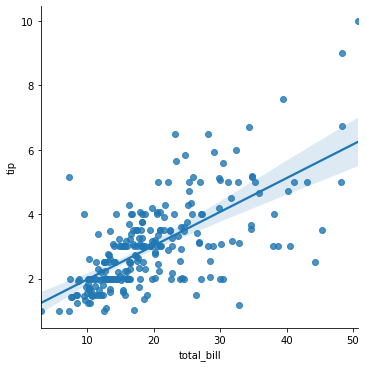

In [1]:
# Import the pandas and seaborn libraries and see example of earlier scatter plot
import seaborn as sns

# load a copy of the tips dataset
tips = sns.load_dataset('tips')

# Scatterplot with regression line using lmplot
fig = sns.lmplot(x='total_bill', y='tip', data=tips)

# The statsmodels library
Since we know what the regression line looks like from the above plot, let's use the "tips" data to find the equation of the line. There are multiple libraries we could use to create our regression model, but we will use the `statsmodels` library here. Later, we'll take a quick look at another popular library.

https://www.statsmodels.org/dev/regression.html

If you look at the `statsmodels` documentation, you will see that there are even multiple ways to specify our model parameters when using that library. We will use the `formula` API from `statsmodels` for our model specification. This API allows us to use what are called R-style formulas in our code. We'll talk about that more in our example.

https://www.statsmodels.org/dev/example_formulas.html

In [2]:
# import formula API from statsmodel using the conventional statement

import statsmodels.formula.api as smf

In [3]:
# Look at the tips data to review how it is structured
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Simple linear regression
A simple linear regression model uses just one independent variable to explain the dependent variable. This simple linear regression problem will use the `ols` function from the statsmodels.formula library. Ordinary least squares is one common method to estimate the parameters of a regression line. First we'll write the code using the R-style formula, then discuss what it does.


In [4]:
# Create the model specification using OLS, then fit the data to the model spec
model=smf.ols(formula="tip ~total_bill", data=tips)
results=model.fit()

In [5]:
# Display the results from our OLS regression (use print())
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           6.69e-34
Time:                        14:42:43   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

How do we interpret the results? We can use the coefficient values to predict a tip (y) based upon the total bill (x).

\begin{equation*}
y = 0.1050x + 0.9203
\end{equation*}

We have some options for getting the results. We can use the `params` attribute to get just the coefficients and the `conf_int()` method to get just the confidence interval parameters.

In [6]:
# Use the params attribute to get the coefficients
print(results.params)

Intercept     0.920270
total_bill    0.105025
dtype: float64


In [7]:
# Use the conf_int method to get the confidence interval
print(results.conf_int())

                   0         1
Intercept   0.605622  1.234918
total_bill  0.090517  0.119532


## Exercise: simple linear regression
Use the file 'Employee.csv' and `statsmodels.formula` to create a simple linear regression model that predicts 'salary' from 'salbegin'. Note: the column 'id' should be used as the index column when reading the data.

In [8]:
# Simple regression using statsmodels


# Multiple Regression
With the simple regression we just did, we regressed our response variable on one predictor variable. We can also regress the response variable on more than one predictor variable. When we do that, we call it _multiple regression_.

In this case, the equation of the line is represented by 
\begin{equation*}
y = m_1x_1 + m_2x_2 + ... + m_ix_i + b
\end{equation*}
where
<ul style="list-style-type:none;">
    <li><i><b>y</i></b> is the value we are predicting (the dependent or response variable),</li>
    <li><i><b>x</i></b> is the value of a predictor variable. The multiple predictors are denoted as x<sub>1</sub> through x<sub>i</sub>,</li>
<li><i><b>m</i></b> is the value of a regression coefficient. The multiple coefficients are denoted as m<sub>1</sub> through m<sub>i</sub>, and</li>
<li><i><b>b</i></b> is the intercept.</li>
</ul>

The code to fit a multiple regression model to our data set using the `statsmodels.formula` API is the same as for a simple regression, with one exception: we need to "add" the additional predictors to the right hand side of the model specification using plus signs.

For example, in the earlier simple example we wrote
```
model = smf.ols(formula='tip ~ total_bill', data=tips)
```
Now we need to add `size` as a predictor.

In [5]:
# Specify the model adding size as a predictor
model = smf.ols(formula='tip ~ total_bill+size', data=tips)
results=model.fit()
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           9.67e-34
Time:                        15:12:11   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.0

With two predictors, we are modeling the following equation:
\begin{equation*}
y = m_1x_1 + m_2x_2 + b
\end{equation*}

We interpret the overall results the same way as with the simple regression example. We can use the coefficient values to predict a tip (y) based upon the total bill (x<sub>1</sub>) and size (x<sub>2</sub>).

The predicted regression coefficients are all significant, so they all remain in our model. With the results added, the equation becomes
\begin{equation*}
y = 0.0927total bill + 0.1926size + 0.6689
\end{equation*}

If we want to interpret individual coefficients, it is with the understanding that the others are held constant. For example, we would say that the tip increases by about 19 cents for every person added to the party as long as the total bill doesn't change.

We can still use the `params` attribute to get just the coefficients and the `conf_int()` method to get just the confidence interval parameters if that is all we want.

## Exercise: multiple regression with statsmodels
Use the file 'Employee.csv' to create a linear regression model that predicts 'salary' using 'salbegin' and 'educ' and the statsmodels library. Write all the necessary code in the cell below. Note: the column 'id' should be used as the index column when reading the data.

In [10]:
# Multiple regression using statsmodels


# Regression with categorical predictors

The examples have only used continuous predictors to this point. Like many data sets, the `tips` data contains categorical data like "sex" (values of "Male" and "Female") and "day" (values of "Thur", "Fri", "Sat", and "Sun"). What if we want to use one of those variables as a possible predictor?

The ordinary least squares algorithm (and many others) can't do anything with text values like "Male" or "Fri" when modeling a regression. We get around that by creating dummy variables.

A _**dummy variable**_ takes the value of 0 (not present) or 1 (present) to indicate the state of a categorical value we think might have an effect on the outcome. To implement dummy variables, each unique value of the categorical variable becomes a new variable (i.e., column in the data set) with a 0 or 1 value. Then, because of some potential advanced statistical problems, we designate one of the values as the reference value and drop it. In the example of the values for "sex," we only need one dummy variable, because if we keep the "Female" dummy variable, we either have a value of 1 (a female) or a value of 0 (not a female, so a male). "Male" becomes the reference value and we drop it from the analysis.

In [11]:
# Check for unique values for sex and day


But there is good news! `statsmodels` will automatically create dummy variables for us AND it drops the reference value. All we do is add the desired categorical variable(s) to the formula.

In [12]:
# Add the categorical variables to our model specification
model = smf.ols(formula='tip ~ total_bill+size', data=tips)
results=model.fit()
# Inspect the results
print(results.summary())

# Inspect the results


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           9.67e-34
Time:                        14:42:44   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.0

We interpret the results for the dummy variables _in terms of the reference value_. For example, we would say from these results that tips are about 16 cents bigger on Friday than Thursday, all else equal. Thursday is the reference value because it is the one missing from the output summary.

**_Except_** - look at the p-values in the summary. None of the categorical variables is significant here, so we would not include them in our model.

---

# The sklearn library
A library specifically created for machine learning in Python is **scikit-learn**. It is built on the NumPy, SciPy, and matplotlib libraries. We import it (or parts of it) using the library name `sklearn`.

https://scikit-learn.org/stable/index.html

Why scikit-learn? This quote from CIO.com sums things up nicely:

> Scikits are Python-based scientific toolboxes built around SciPy, the Python library for scientific computing. Scikit-learn is an open source project focused on machine learning that is careful about avoiding scope creep and jumping on unproven algorithms. On the other hand, it has quite a nice selection of solid algorithms, and it uses Cython (the Python to C compiler) for functions that need to be fast, such as inner loops.
>
> Scikit-learn earns the highest marks for ease of development among all the machine learning frameworks I’ve tested. The algorithms work as advertised and documented, the APIs are consistent and well-designed, and there are few “impedance mismatches” between data structures. It’s a pleasure to work with a library in which features have been thoroughly fleshed out and bugs thoroughly flushed out.
><p style="text-align:right;font-size:80%">from https://www.cio.com/article/3213189/10-hot-data-analytics-trends-and-5-going-cold.html</p>

Of course, the way we build our model specification and the output we see are different with scikit-learn than with statsmodels. 

## Multiple regression using sklearn
We build our regression model in three steps when we use sklearn.
1. Import the linear_model module from sklearn,
2. Create the linear regression object.
3. Specify the predictor (X) and response (y) variables.

We'll create the multiple regression model and inspect the coefficients and intercept. Other values from the model results are also available using the `metrics` module of sklearn. See https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics for more.

In [13]:
# import the linear_model module from sklearn
from sklearn import linear_model

In [14]:
# Create the linear regression object
lr = linear_model.LinearRegression()

In [15]:
# Use total_bill and size as predictors (note the double square brackets in X)
# Remember why we do it that way?
predicted = lr.fit(X=tips[['total_bill','size']], y=tips['tip'])

In [16]:
#Inspect the results
print(predicted.coef_)
print(predicted.intercept_)

[0.09271334 0.19259779]
0.6689447408125027


## Simple regression using sklearn
The simple regression model follows the same steps as the multiple regression one. We just have one predictor in X so it doesn't need to be inside a list.

In [17]:
# The import statement is already run.
# Create the linear regression object
lr = linear_model.LinearRegression()

In [23]:
# Specify the predictor (X) and response (y) variable
predicted = lr.fit(X=tips['total_bill'], y=tips['tip'])

ValueError: Expected 2D array, got 1D array instead:
array=[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 26.86 25.28 14.73 10.51 17.92 27.2  22.76 17.29 19.44 16.66 10.07 32.68
 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 27.28 12.03 21.01 12.46 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21
 18.24 14.31 14.    7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
 11.69 13.42 14.26 15.95 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27
 11.17 12.26 18.26  8.51 10.33 14.15 16.   13.16 17.47 34.3  41.19 27.05
 16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.55 19.77 29.85
 48.17 25.   13.39 16.49 21.5  12.66 16.21 13.81 17.51 24.52 20.76 31.71
 10.59 10.63 50.81 15.81  7.25 31.85 16.82 32.9  17.89 14.48  9.6  34.63
 34.65 23.33 45.35 23.17 40.55 20.69 20.9  30.46 18.15 23.1  15.69 19.81
 28.44 15.48 16.58  7.56 10.34 43.11 13.   13.51 18.71 12.74 13.   16.4
 20.53 16.47 26.59 38.73 24.27 12.76 30.06 25.89 48.33 13.27 28.17 12.9
 28.15 11.59  7.74 30.14 12.16 13.42  8.58 15.98 13.42 16.27 10.09 20.45
 13.28 22.12 24.01 15.69 11.61 10.77 15.53 10.07 12.6  32.83 35.83 29.03
 27.18 22.67 17.82 18.78].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

This version fails because of the way the sklearn linear regression model is built. You can see at the bottom of the error message what we need to do. The issue is that the linear regression object defaults to a _multiple_ linear regression format, so it is expecting a list of predictor variables. Since we have only one predictor here ("a single feature"), we use reshape(-1,1) on our predictor (X) data values to make it work.

Let's look at the difference with and without the reshape to see what is happening.

In [24]:
# Inspect the values without reshape
tips['total_bill'].values

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02,
       18.29, 17.59, 20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07,
       26.86, 25.28, 14.73, 10.51, 17.92, 27.2 , 22.76, 17.29, 19.44,
       16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16,
       28.97, 22.49,  5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01,
       12.46, 11.35, 15.38, 44.3 , 22.42, 20.92, 15.36, 20.49, 25.21,
       18.24, 14.31, 14.  ,  7.25, 38.07, 23.95, 25.71, 17.31, 29.93,
       10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8 ,
        8.52, 14.52,

In [25]:
# See the result of using reshape
tips['total_bill'].values.reshape(-1,1)

array([[16.99],
       [10.34],
       [21.01],
       [23.68],
       [24.59],
       [25.29],
       [ 8.77],
       [26.88],
       [15.04],
       [14.78],
       [10.27],
       [35.26],
       [15.42],
       [18.43],
       [14.83],
       [21.58],
       [10.33],
       [16.29],
       [16.97],
       [20.65],
       [17.92],
       [20.29],
       [15.77],
       [39.42],
       [19.82],
       [17.81],
       [13.37],
       [12.69],
       [21.7 ],
       [19.65],
       [ 9.55],
       [18.35],
       [15.06],
       [20.69],
       [17.78],
       [24.06],
       [16.31],
       [16.93],
       [18.69],
       [31.27],
       [16.04],
       [17.46],
       [13.94],
       [ 9.68],
       [30.4 ],
       [18.29],
       [22.23],
       [32.4 ],
       [28.55],
       [18.04],
       [12.54],
       [10.29],
       [34.81],
       [ 9.94],
       [25.56],
       [19.49],
       [38.01],
       [26.41],
       [11.24],
       [48.27],
       [20.29],
       [13.81],
       [

In [26]:
# Run the corrected code to create the model
predicted = lr.fit(X=tips['total_bill'].values.reshape(-1,1), y=tips['tip'])

In [27]:
# Look at the results generated using sklearn
# They are the same values as with statsmodels
print(predicted.coef_)
print(predicted.intercept_)

[0.10502452]
0.9202696135546731


## Categoricals using sklearn
With sklearn, we have to create our own dummy variables. However, pandas has a function called `get_dummies` that will do the work for us. It will convert all categoricals in a data frame into dummy variables. We can save the results as a new data frame and run the multiple regression like before with the additional variables included in the model specification.

In [29]:
import pandas as pd

In [30]:
# create the dummy variables and save in a new data frame (double square brackets again)
tips_dummy=pd.get_dummies(tips[['total_bill','size','sex','smoker','day','time']])
tips_dummy.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,0,1,0,1,0,0,0,1,0,1
1,10.34,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3,1,0,0,1,0,0,0,1,0,1
3,23.68,2,1,0,0,1,0,0,0,1,0,1
4,24.59,4,0,1,0,1,0,0,0,1,0,1


The only problem is that we have all the dummy values present. We need to drop the reference values. We can do that with the same code by adding `drop_first=True` to the get_dummies function as an argument.

In [31]:
# create the dummy variables and save in a new data frame without reference values
tips_dummy=pd.get_dummies(tips[['total_bill','size','sex','smoker','day','time']], drop_first=True)
tips_dummy.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


Now we can fit the regression model to this data set. Note that since we only have the predictor variables in the tips_dummy data frame, we don't need to list specific columns for the value of X.

In [32]:
# Create the linear regression object
lr = linear_model.LinearRegression()

# Add size as a predictor (note the double square brackets in X)
predicted = lr.fit(X=tips_dummy, y=tips['tip'])

#Inspect the results
print(predicted.coef_)
print(predicted.intercept_)

[ 0.09448701  0.175992    0.03244094  0.08640832  0.1622592   0.04080082
  0.13677854 -0.0681286 ]
0.5908374259513769


## Cleaning up the sklearn output
The coefficients are in the same order they are in the data set. But it would be much nicer if they were labeled. The results are stored in a numpy array, which can't handle values and labels. We have to store the labels separately and append the coefficient values to them.

This same technique can be applied to the results in **_any_** of the sklearn examples covered in this notebook.

In [33]:
# import numpy
import numpy as np

# The model was fit in the last code cell.
# Get the intercept and coefficients, and store them in an object named values
values = np.append(predicted.intercept_, predicted.coef_)

# Get the names of the values
names = np.append('intercept', tips_dummy.columns)

# Put everything together in a labeled data frame and display results
results = pd.DataFrame(values, index=names, columns=['coeff'])
print(results)

                coeff
intercept    0.590837
total_bill   0.094487
size         0.175992
sex_Female   0.032441
smoker_No    0.086408
day_Fri      0.162259
day_Sat      0.040801
day_Sun      0.136779
time_Dinner -0.068129


In [35]:
values

array([ 0.59083743,  0.09448701,  0.175992  ,  0.03244094,  0.08640832,
        0.1622592 ,  0.04080082,  0.13677854, -0.0681286 ])

In [34]:
names

array(['intercept', 'total_bill', 'size', 'sex_Female', 'smoker_No',
       'day_Fri', 'day_Sat', 'day_Sun', 'time_Dinner'], dtype=object)